### Sarvagya Singh 
### 60009200030 -- K1
### IPCV - LAB4

In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

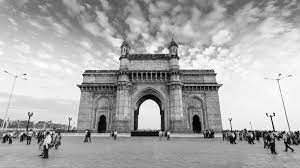

In [ ]:
img = cv2.imread('/content/gateway.jpeg', 0) 
cv2_imshow(img)

In [ ]:
img.shape

(168, 300)

In [ ]:
gauss_noise=np.zeros((168,300),dtype=np.uint8)
cv2.randn(gauss_noise,128,20)
gauss_noise=(gauss_noise*0.5).astype(np.uint8)

In [ ]:
gn_img=cv2.add(img, gauss_noise)

Text(0.5, 1.0, 'Combined')

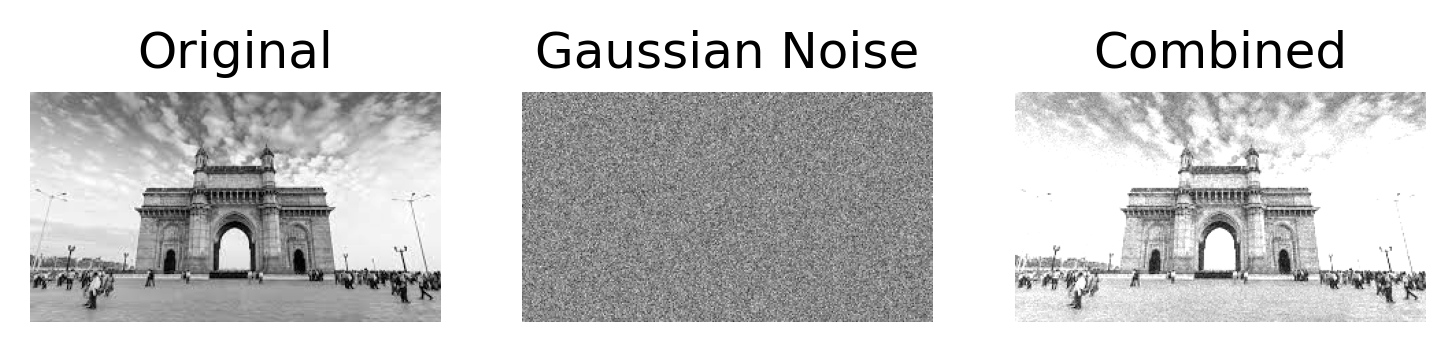

In [ ]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gauss_noise,cmap='gray')
plt.axis("off")
plt.title("Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

In [ ]:
filter = np.array([[1/9 for i in range(3)] for j in range(3)])
filter

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [ ]:
gn_img

array([[255, 253, 237, ..., 152, 164, 191],
       [238, 237, 239, ..., 180, 167, 199],
       [238, 228, 236, ..., 193, 157, 213],
       ...,
       [242, 255, 250, ..., 237, 235, 224],
       [236, 255, 249, ..., 235, 241, 251],
       [252, 255, 233, ..., 241, 240, 227]], dtype=uint8)

# **Average Filter**

In [ ]:
output = []
for r in range(gn_img.shape[0]-2): 
  temp = []
  for c in range(gn_img.shape[1]-2):
    lhs = gn_img[r:r+3, c:c+3]
    ans = 0 
    for r_f in range(filter.shape[0]): 
      for c_f in range(filter.shape[1]):
        ans += lhs[r_f][c_f]*filter[r_f][c_f] 
    temp.append(ans) 
  output.append(temp)

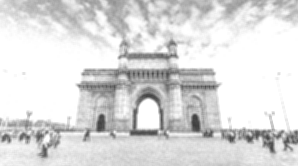

In [ ]:
output = np.array(output)
cv2_imshow(output)

Text(0.5, 1.0, 'Average Filter')

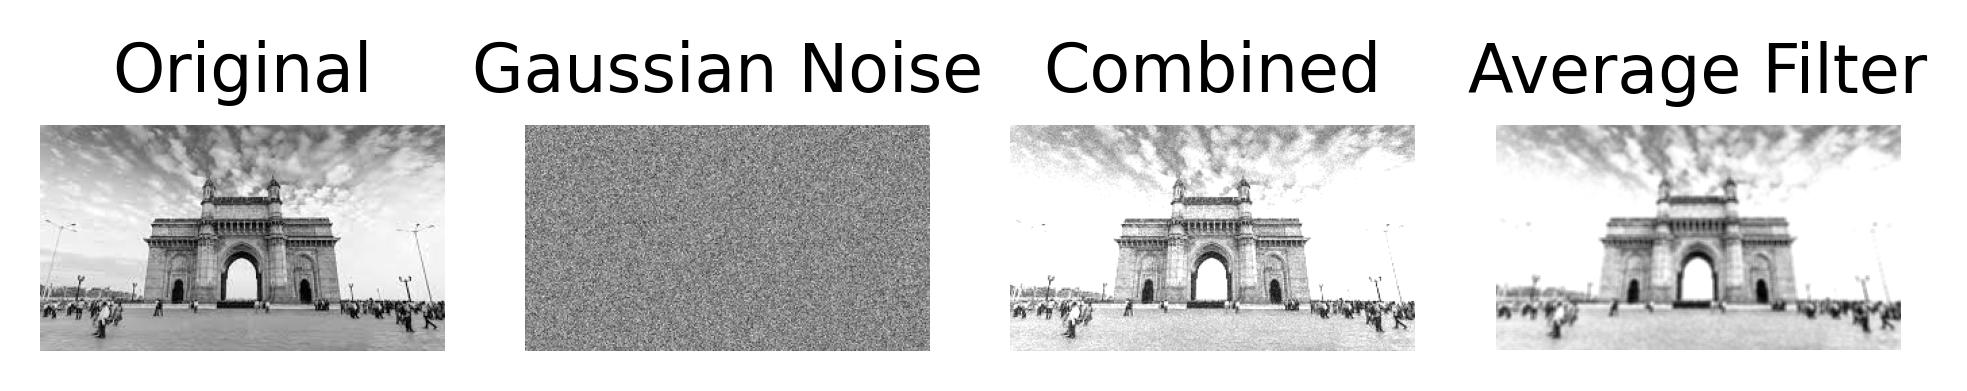

In [ ]:
fig=plt.figure(dpi=400)

fig.add_subplot(1,4,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,4,2)
plt.imshow(gauss_noise,cmap='gray')
plt.axis("off")
plt.title("Gaussian Noise")

fig.add_subplot(1,4,3)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

fig.add_subplot(1,4,4)
plt.imshow(output,cmap='gray')
plt.axis("off")
plt.title("Average Filter")

# **Median Filter**

In [ ]:
import random 
salt_and_pepper_img = img.copy()
salt_and_pepper_img

array([[193, 188, 180, ..., 107, 100, 111],
       [182, 179, 173, ..., 111, 106, 115],
       [170, 168, 165, ..., 117, 115, 123],
       ...,
       [182, 182, 181, ..., 173, 167, 161],
       [189, 188, 187, ..., 177, 176, 175],
       [176, 175, 173, ..., 161, 166, 171]], dtype=uint8)

In [ ]:
for i in range(200):
  row = random.randint(0, img.shape[0]-1) 
  col = random.randint(0, img.shape[1]-1) 
  n = random.randint(0,1) 
  if(n==0):
    salt_and_pepper_img[row][col] = 0 
  else: 
    salt_and_pepper_img[row][col] = 255 

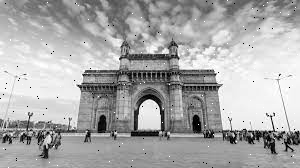

In [ ]:
cv2_imshow(salt_and_pepper_img)

In [ ]:
output = []
for r in range(salt_and_pepper_img.shape[0]-2): 
  temp = []
  for c in range(salt_and_pepper_img.shape[1]-2):
    lhs = salt_and_pepper_img[r:r+3, c:c+3]
    lhs_flatten = lhs.flatten() 
    lhs_flatten.sort() 
    temp.append(lhs_flatten[4]) 
  output.append(temp)

In [ ]:
output = np.array(output)

Text(0.5, 1.0, 'Median Filter')

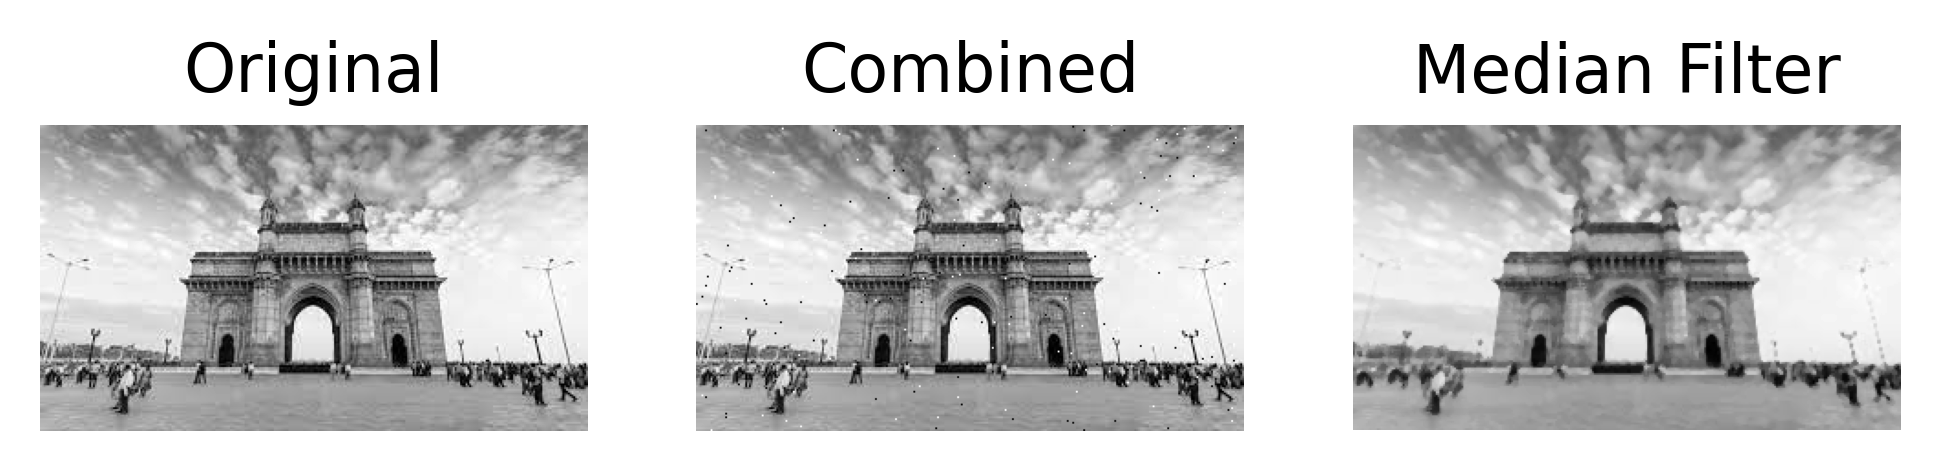

In [ ]:
fig=plt.figure(dpi=400)

fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(salt_and_pepper_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

fig.add_subplot(1,3,3)
plt.imshow(output,cmap='gray')
plt.axis("off")
plt.title("Median Filter")